# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.01896541960606335


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 3.865091e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 1.555470e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.01714364353292376


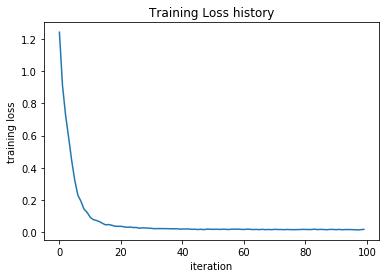

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [7]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302762
iteration 100 / 1000: loss 2.302358
iteration 200 / 1000: loss 2.297404
iteration 300 / 1000: loss 2.258897
iteration 400 / 1000: loss 2.202975
iteration 500 / 1000: loss 2.116816
iteration 600 / 1000: loss 2.049789
iteration 700 / 1000: loss 1.985711
iteration 800 / 1000: loss 2.003726
iteration 900 / 1000: loss 1.948076
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

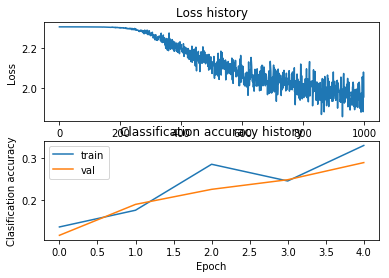

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

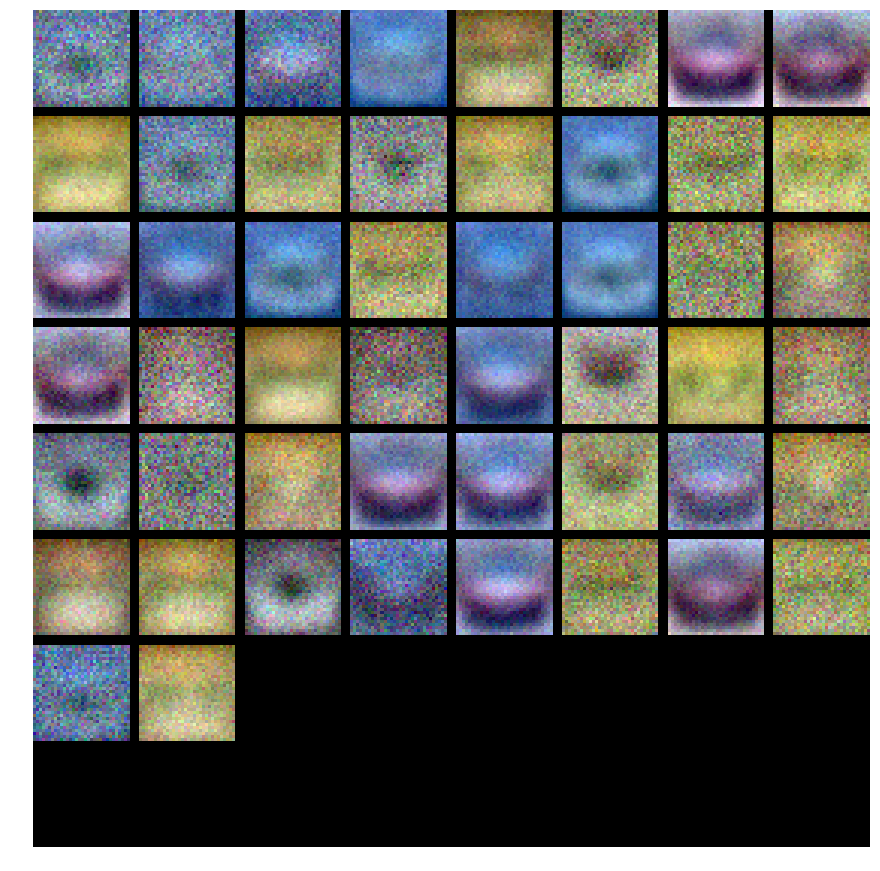

In [10]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network
def show_net_weights(net):
    plt.figure(figsize=(15,25));
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

## Tuning Main Method

In [16]:
from cs231n.classifiers.neural_net import TwoLayerNet
def GridSearch(params_values):
    input_size = X_train.shape[1]

    num_classes = 10
    results = {}
    best_net = None
    best_val = -1
    ################################################################################
    # TODO: Train a two-layer neural network on image features. You may want to    #
    # cross-validate various parameters as in previous sections. Store your best   #
    # model in the best_net variable.                                              #
    ################################################################################

    # Predict on the validation set
    #val_acc = (net.predict(X_val) == y_val).mean()
    #print('Validation accuracy: ', val_acc)
    i = 0
    for (lr, reg,hidden_size,epoch_num) in params_values:
        net = TwoLayerNet(input_size, hidden_size, num_classes)
        tic = time.time()

        # Train the network
        stats = net.train(X_train, y_train, X_val, y_val,
                    num_iters=epoch_num, batch_size=200,
                    learning_rate=lr, learning_rate_decay=0.95,
                    reg=reg, verbose=True)
        toc = time.time()
        print('That took %fs' % (toc - tic))
        # training and validation set
        y_train_pred = net.predict(X_train)
        y_train_acc = np.mean(y_train == y_train_pred)
        print('training accuracy: %f' % y_train_acc)
        y_val_pred = net.predict(X_val)
        y_val_acc = np.mean(y_val == y_val_pred)
        print('validation accuracy: %f' % y_val_acc)
        results[(lr, reg,hidden_size,epoch_num)]=(y_train_acc,y_val_acc)
        if y_val_acc > best_val:
            best_val = y_val_acc
            best_net = net
        # Plot the loss function and train / validation accuracies
        plt.subplot(2, 1, 1)
        plt.plot(stats['loss_history'])
        plt.title('Loss history')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')

        plt.subplot(2, 1, 2)
        plt.plot(stats['train_acc_history'], label='train')
        plt.plot(stats['val_acc_history'], label='val')
        plt.title('Classification accuracy history')
        plt.xlabel('Epoch')
        plt.ylabel('Clasification accuracy')
        plt.legend()
        plt.show()
    return (results,best_val,best_net)
    ################################################################################
    #                              END OF YOUR CODE                                #
    ################################################################################

# Tuning 1
** Tuning hidden layer size (number of nodes) **

iteration 0 / 3000: loss 2.302615
iteration 100 / 3000: loss 2.294527
iteration 200 / 3000: loss 2.235246
iteration 300 / 3000: loss 2.167374
iteration 400 / 3000: loss 2.059464
iteration 500 / 3000: loss 2.079534
iteration 600 / 3000: loss 2.036588
iteration 700 / 3000: loss 1.923354
iteration 800 / 3000: loss 1.955179
iteration 900 / 3000: loss 1.903373
iteration 1000 / 3000: loss 1.870597
iteration 1100 / 3000: loss 1.888298
iteration 1200 / 3000: loss 1.902029
iteration 1300 / 3000: loss 1.814620
iteration 1400 / 3000: loss 1.834111
iteration 1500 / 3000: loss 1.770249
iteration 1600 / 3000: loss 1.868618
iteration 1700 / 3000: loss 1.730032
iteration 1800 / 3000: loss 1.770552
iteration 1900 / 3000: loss 1.711958
iteration 2000 / 3000: loss 1.782984
iteration 2100 / 3000: loss 1.854925
iteration 2200 / 3000: loss 1.766088
iteration 2300 / 3000: loss 1.788098
iteration 2400 / 3000: loss 1.688921
iteration 2500 / 3000: loss 1.763960
iteration 2600 / 3000: loss 1.684739
iteration 270

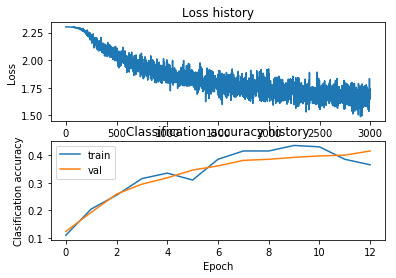

iteration 0 / 3000: loss 2.302694
iteration 100 / 3000: loss 2.297995
iteration 200 / 3000: loss 2.251454
iteration 300 / 3000: loss 2.147584
iteration 400 / 3000: loss 2.106247
iteration 500 / 3000: loss 2.097034
iteration 600 / 3000: loss 2.024462
iteration 700 / 3000: loss 1.992968
iteration 800 / 3000: loss 1.935980
iteration 900 / 3000: loss 1.924067
iteration 1000 / 3000: loss 1.907150
iteration 1100 / 3000: loss 1.838501
iteration 1200 / 3000: loss 1.874912
iteration 1300 / 3000: loss 1.823285
iteration 1400 / 3000: loss 1.899378
iteration 1500 / 3000: loss 1.828361
iteration 1600 / 3000: loss 1.784121
iteration 1700 / 3000: loss 1.718188
iteration 1800 / 3000: loss 1.677112
iteration 1900 / 3000: loss 1.877924
iteration 2000 / 3000: loss 1.776517
iteration 2100 / 3000: loss 1.685761
iteration 2200 / 3000: loss 1.659932
iteration 2300 / 3000: loss 1.569315
iteration 2400 / 3000: loss 1.675509
iteration 2500 / 3000: loss 1.688633
iteration 2600 / 3000: loss 1.662635
iteration 270

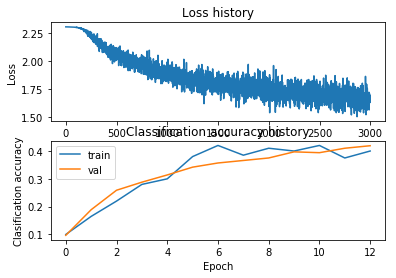

iteration 0 / 3000: loss 2.302619
iteration 100 / 3000: loss 2.299077
iteration 200 / 3000: loss 2.278277
iteration 300 / 3000: loss 2.256260
iteration 400 / 3000: loss 2.140296
iteration 500 / 3000: loss 2.095969
iteration 600 / 3000: loss 1.992597
iteration 700 / 3000: loss 1.976554
iteration 800 / 3000: loss 1.930689
iteration 900 / 3000: loss 1.906807
iteration 1000 / 3000: loss 1.925981
iteration 1100 / 3000: loss 1.887835
iteration 1200 / 3000: loss 1.916482
iteration 1300 / 3000: loss 1.793444
iteration 1400 / 3000: loss 1.854645
iteration 1500 / 3000: loss 1.841411
iteration 1600 / 3000: loss 1.808151
iteration 1700 / 3000: loss 1.790584
iteration 1800 / 3000: loss 1.782897
iteration 1900 / 3000: loss 1.841507
iteration 2000 / 3000: loss 1.714684
iteration 2100 / 3000: loss 1.780946
iteration 2200 / 3000: loss 1.648946
iteration 2300 / 3000: loss 1.669364
iteration 2400 / 3000: loss 1.658339
iteration 2500 / 3000: loss 1.772254
iteration 2600 / 3000: loss 1.681849
iteration 270

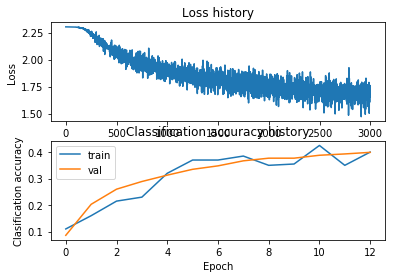

iteration 0 / 3000: loss 2.302532
iteration 100 / 3000: loss 2.301366
iteration 200 / 3000: loss 2.290391
iteration 300 / 3000: loss 2.232461
iteration 400 / 3000: loss 2.156072
iteration 500 / 3000: loss 2.082571
iteration 600 / 3000: loss 2.055860
iteration 700 / 3000: loss 1.947257
iteration 800 / 3000: loss 1.991666
iteration 900 / 3000: loss 1.840478
iteration 1000 / 3000: loss 1.937530
iteration 1100 / 3000: loss 1.939142
iteration 1200 / 3000: loss 1.888702
iteration 1300 / 3000: loss 1.892519
iteration 1400 / 3000: loss 1.884611
iteration 1500 / 3000: loss 1.937068
iteration 1600 / 3000: loss 1.849186
iteration 1700 / 3000: loss 1.781473
iteration 1800 / 3000: loss 1.749962
iteration 1900 / 3000: loss 1.796679
iteration 2000 / 3000: loss 1.793539
iteration 2100 / 3000: loss 1.723193
iteration 2200 / 3000: loss 1.701514
iteration 2300 / 3000: loss 1.783404
iteration 2400 / 3000: loss 1.718630
iteration 2500 / 3000: loss 1.735298
iteration 2600 / 3000: loss 1.716781
iteration 270

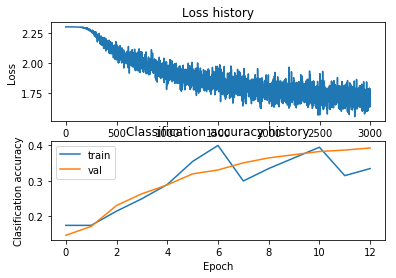

iteration 0 / 3000: loss 2.302543
iteration 100 / 3000: loss 2.295718
iteration 200 / 3000: loss 2.270196
iteration 300 / 3000: loss 2.173657
iteration 400 / 3000: loss 2.097349
iteration 500 / 3000: loss 2.004381
iteration 600 / 3000: loss 1.931529
iteration 700 / 3000: loss 1.950208
iteration 800 / 3000: loss 1.861834
iteration 900 / 3000: loss 2.001787
iteration 1000 / 3000: loss 1.804840
iteration 1100 / 3000: loss 1.890785
iteration 1200 / 3000: loss 1.800003
iteration 1300 / 3000: loss 1.793901
iteration 1400 / 3000: loss 1.828255
iteration 1500 / 3000: loss 1.749218
iteration 1600 / 3000: loss 1.796439
iteration 1700 / 3000: loss 1.811658
iteration 1800 / 3000: loss 1.748757
iteration 1900 / 3000: loss 1.732683
iteration 2000 / 3000: loss 1.694067
iteration 2100 / 3000: loss 1.711123
iteration 2200 / 3000: loss 1.726467
iteration 2300 / 3000: loss 1.709894
iteration 2400 / 3000: loss 1.711853
iteration 2500 / 3000: loss 1.693393
iteration 2600 / 3000: loss 1.768000
iteration 270

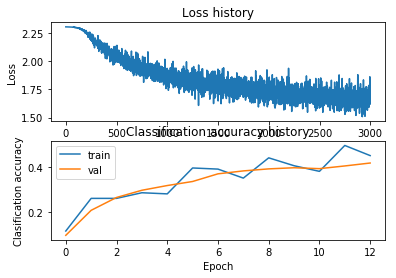

iteration 0 / 3000: loss 2.302511
iteration 100 / 3000: loss 2.298099
iteration 200 / 3000: loss 2.246285
iteration 300 / 3000: loss 2.142292
iteration 400 / 3000: loss 2.116648
iteration 500 / 3000: loss 2.041258
iteration 600 / 3000: loss 2.044629
iteration 700 / 3000: loss 1.937871
iteration 800 / 3000: loss 1.929819
iteration 900 / 3000: loss 1.922586
iteration 1000 / 3000: loss 1.786964
iteration 1100 / 3000: loss 1.867729
iteration 1200 / 3000: loss 1.896133
iteration 1300 / 3000: loss 1.801911
iteration 1400 / 3000: loss 1.840833
iteration 1500 / 3000: loss 1.792982
iteration 1600 / 3000: loss 1.738322
iteration 1700 / 3000: loss 1.806339
iteration 1800 / 3000: loss 1.813435
iteration 1900 / 3000: loss 1.748467
iteration 2000 / 3000: loss 1.695942
iteration 2100 / 3000: loss 1.770379
iteration 2200 / 3000: loss 1.679850
iteration 2300 / 3000: loss 1.678128
iteration 2400 / 3000: loss 1.683013
iteration 2500 / 3000: loss 1.708516
iteration 2600 / 3000: loss 1.678703
iteration 270

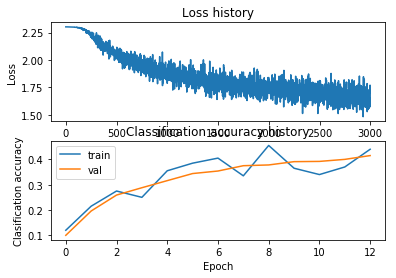

iteration 0 / 3000: loss 2.302565
iteration 100 / 3000: loss 2.299868
iteration 200 / 3000: loss 2.270076
iteration 300 / 3000: loss 2.221473
iteration 400 / 3000: loss 2.137245
iteration 500 / 3000: loss 2.064905
iteration 600 / 3000: loss 2.027858
iteration 700 / 3000: loss 1.917322
iteration 800 / 3000: loss 2.026116
iteration 900 / 3000: loss 1.921691
iteration 1000 / 3000: loss 1.800791
iteration 1100 / 3000: loss 1.838344
iteration 1200 / 3000: loss 1.764175
iteration 1300 / 3000: loss 1.934933
iteration 1400 / 3000: loss 1.991518
iteration 1500 / 3000: loss 1.772614
iteration 1600 / 3000: loss 1.655771
iteration 1700 / 3000: loss 1.819773
iteration 1800 / 3000: loss 1.739980
iteration 1900 / 3000: loss 1.782048
iteration 2000 / 3000: loss 1.737345
iteration 2100 / 3000: loss 1.688888
iteration 2200 / 3000: loss 1.754311
iteration 2300 / 3000: loss 1.712421
iteration 2400 / 3000: loss 1.745814
iteration 2500 / 3000: loss 1.644906
iteration 2600 / 3000: loss 1.777064
iteration 270

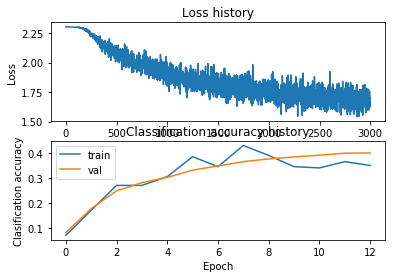

iteration 0 / 3000: loss 2.302575
iteration 100 / 3000: loss 2.301612
iteration 200 / 3000: loss 2.288872
iteration 300 / 3000: loss 2.235951
iteration 400 / 3000: loss 2.192442
iteration 500 / 3000: loss 2.125124
iteration 600 / 3000: loss 2.083136
iteration 700 / 3000: loss 2.001741
iteration 800 / 3000: loss 1.997558
iteration 900 / 3000: loss 1.979626
iteration 1000 / 3000: loss 1.941535
iteration 1100 / 3000: loss 1.905246
iteration 1200 / 3000: loss 1.936579
iteration 1300 / 3000: loss 1.856423
iteration 1400 / 3000: loss 1.852964
iteration 1500 / 3000: loss 1.845357
iteration 1600 / 3000: loss 1.870632
iteration 1700 / 3000: loss 1.752064
iteration 1800 / 3000: loss 1.833448
iteration 1900 / 3000: loss 1.848814
iteration 2000 / 3000: loss 1.808915
iteration 2100 / 3000: loss 1.737046
iteration 2200 / 3000: loss 1.784660
iteration 2300 / 3000: loss 1.831351
iteration 2400 / 3000: loss 1.740826
iteration 2500 / 3000: loss 1.715816
iteration 2600 / 3000: loss 1.817580
iteration 270

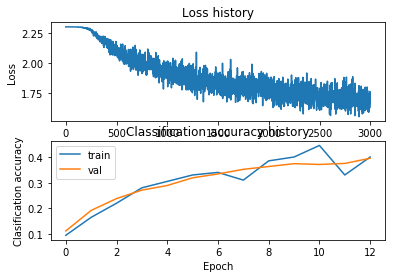

In [18]:
hidden_sizes = [700,500,300,100]
learning_rates = [1e-4]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
regularization_strengths = [0,.000005]
epochs = [3000]
params_values = [(lr, reg,hidden_size,epoch_num) for lr in learning_rates
                                       for reg in regularization_strengths
                                       for hidden_size in hidden_sizes
                                        for epoch_num in epochs]
#params_values
results,best_val,best_net = GridSearch(params_values)

In [19]:
def print_train_valid_scores(results,best_val):
    # Print out results.
    for lr, reg,hidden_size,epoch_num in sorted(results):
        train_accuracy, val_accuracy = results[(lr, reg,hidden_size,epoch_num)]
        print('lr %e reg %e hidden_size %d epoch_num %d train accuracy: %f val accuracy: %f' % (
                    lr, reg,hidden_size,epoch_num, train_accuracy, val_accuracy))
        #print('%e,%e,%d,%d,%f,%f' % (
        #            lr, reg,hidden_size,epoch_num, train_accuracy, val_accuracy))
    print('best validation accuracy achieved during cross-validation: %f' % best_val)

In [20]:
print_train_valid_scores(results,best_val)

lr 1.000000e-04 reg 0.000000e+00 hidden_size 100 epoch_num 3000 train accuracy: 0.397429 val accuracy: 0.397000
lr 1.000000e-04 reg 0.000000e+00 hidden_size 300 epoch_num 3000 train accuracy: 0.406612 val accuracy: 0.408000
lr 1.000000e-04 reg 0.000000e+00 hidden_size 500 epoch_num 3000 train accuracy: 0.412510 val accuracy: 0.419000
lr 1.000000e-04 reg 0.000000e+00 hidden_size 700 epoch_num 3000 train accuracy: 0.412837 val accuracy: 0.417000
lr 1.000000e-04 reg 5.000000e-06 hidden_size 100 epoch_num 3000 train accuracy: 0.395429 val accuracy: 0.406000
lr 1.000000e-04 reg 5.000000e-06 hidden_size 300 epoch_num 3000 train accuracy: 0.406388 val accuracy: 0.407000
lr 1.000000e-04 reg 5.000000e-06 hidden_size 500 epoch_num 3000 train accuracy: 0.410612 val accuracy: 0.409000
lr 1.000000e-04 reg 5.000000e-06 hidden_size 700 epoch_num 3000 train accuracy: 0.415245 val accuracy: 0.416000
best validation accuracy achieved during cross-validation: 0.419000


# Tuning 2
** Increasing # epochs **

iteration 0 / 10000: loss 2.302666
iteration 100 / 10000: loss 2.297583
iteration 200 / 10000: loss 2.261947
iteration 300 / 10000: loss 2.165695
iteration 400 / 10000: loss 2.160027
iteration 500 / 10000: loss 1.997295
iteration 600 / 10000: loss 1.913973
iteration 700 / 10000: loss 1.888159
iteration 800 / 10000: loss 1.909747
iteration 900 / 10000: loss 1.958521
iteration 1000 / 10000: loss 1.902125
iteration 1100 / 10000: loss 1.940328
iteration 1200 / 10000: loss 1.750530
iteration 1300 / 10000: loss 1.777711
iteration 1400 / 10000: loss 1.829126
iteration 1500 / 10000: loss 1.681280
iteration 1600 / 10000: loss 1.876892
iteration 1700 / 10000: loss 1.804141
iteration 1800 / 10000: loss 1.634336
iteration 1900 / 10000: loss 1.745176
iteration 2000 / 10000: loss 1.759959
iteration 2100 / 10000: loss 1.733902
iteration 2200 / 10000: loss 1.629135
iteration 2300 / 10000: loss 1.705545
iteration 2400 / 10000: loss 1.629989
iteration 2500 / 10000: loss 1.721019
iteration 2600 / 10000: 

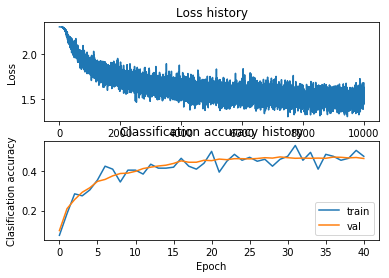

iteration 0 / 10000: loss 2.302704
iteration 100 / 10000: loss 2.298431
iteration 200 / 10000: loss 2.277006
iteration 300 / 10000: loss 2.171887
iteration 400 / 10000: loss 2.080681
iteration 500 / 10000: loss 2.011210
iteration 600 / 10000: loss 2.034303
iteration 700 / 10000: loss 1.983075
iteration 800 / 10000: loss 1.876183
iteration 900 / 10000: loss 1.937905
iteration 1000 / 10000: loss 1.831242
iteration 1100 / 10000: loss 1.779747
iteration 1200 / 10000: loss 1.783608
iteration 1300 / 10000: loss 1.761262
iteration 1400 / 10000: loss 1.782500
iteration 1500 / 10000: loss 1.825019
iteration 1600 / 10000: loss 1.771069
iteration 1700 / 10000: loss 1.850603
iteration 1800 / 10000: loss 1.735214
iteration 1900 / 10000: loss 1.752581
iteration 2000 / 10000: loss 1.652016
iteration 2100 / 10000: loss 1.726724
iteration 2200 / 10000: loss 1.785084
iteration 2300 / 10000: loss 1.642606
iteration 2400 / 10000: loss 1.765388
iteration 2500 / 10000: loss 1.704781
iteration 2600 / 10000: 

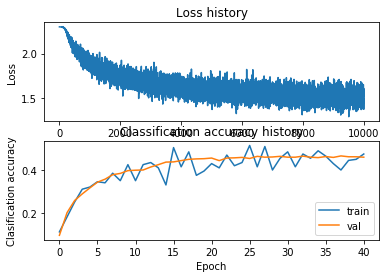

iteration 0 / 10000: loss 2.302549
iteration 100 / 10000: loss 2.297099
iteration 200 / 10000: loss 2.251340
iteration 300 / 10000: loss 2.177715
iteration 400 / 10000: loss 2.136628
iteration 500 / 10000: loss 2.076666
iteration 600 / 10000: loss 2.055078
iteration 700 / 10000: loss 1.981274
iteration 800 / 10000: loss 1.918799
iteration 900 / 10000: loss 1.868888
iteration 1000 / 10000: loss 1.894276
iteration 1100 / 10000: loss 1.796555
iteration 1200 / 10000: loss 1.861277
iteration 1300 / 10000: loss 1.832782
iteration 1400 / 10000: loss 1.882641
iteration 1500 / 10000: loss 1.711945
iteration 1600 / 10000: loss 1.754063
iteration 1700 / 10000: loss 1.747394
iteration 1800 / 10000: loss 1.753611
iteration 1900 / 10000: loss 1.796057
iteration 2000 / 10000: loss 1.732943
iteration 2100 / 10000: loss 1.787580
iteration 2200 / 10000: loss 1.721155
iteration 2300 / 10000: loss 1.581930
iteration 2400 / 10000: loss 1.712262
iteration 2500 / 10000: loss 1.703181
iteration 2600 / 10000: 

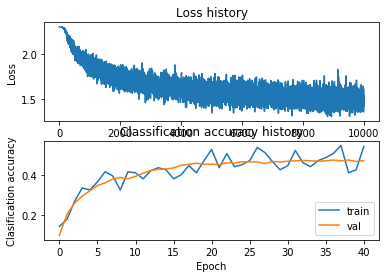

iteration 0 / 10000: loss 2.302539
iteration 100 / 10000: loss 2.298957
iteration 200 / 10000: loss 2.271079
iteration 300 / 10000: loss 2.171120
iteration 400 / 10000: loss 2.079168
iteration 500 / 10000: loss 2.092253
iteration 600 / 10000: loss 1.960724
iteration 700 / 10000: loss 2.007261
iteration 800 / 10000: loss 1.881383
iteration 900 / 10000: loss 1.927368
iteration 1000 / 10000: loss 1.875635
iteration 1100 / 10000: loss 1.842883
iteration 1200 / 10000: loss 1.899897
iteration 1300 / 10000: loss 1.828009
iteration 1400 / 10000: loss 1.706186
iteration 1500 / 10000: loss 1.822761
iteration 1600 / 10000: loss 1.752167
iteration 1700 / 10000: loss 1.769275
iteration 1800 / 10000: loss 1.660696
iteration 1900 / 10000: loss 1.706067
iteration 2000 / 10000: loss 1.766438
iteration 2100 / 10000: loss 1.647732
iteration 2200 / 10000: loss 1.759451
iteration 2300 / 10000: loss 1.623758
iteration 2400 / 10000: loss 1.724533
iteration 2500 / 10000: loss 1.698242
iteration 2600 / 10000: 

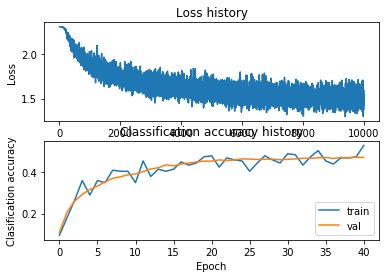

In [21]:
hidden_sizes = [700,500]
learning_rates = [1e-4]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
regularization_strengths = [0,.000005]
epochs = [10000]
params_values = [(lr, reg,hidden_size,epoch_num) for lr in learning_rates
                                       for reg in regularization_strengths
                                       for hidden_size in hidden_sizes
                                        for epoch_num in epochs]
#params_values
results,best_val,best_net = GridSearch(params_values)

In [27]:
print_train_valid_scores(results,best_val)

lr 1.000000e-04 reg 0.000000e+00 hidden_size 500 epoch_num 10000 train accuracy: 0.474755 val accuracy: 0.458000
lr 1.000000e-04 reg 0.000000e+00 hidden_size 700 epoch_num 10000 train accuracy: 0.476694 val accuracy: 0.466000
lr 1.000000e-04 reg 5.000000e-06 hidden_size 500 epoch_num 10000 train accuracy: 0.474816 val accuracy: 0.473000
lr 1.000000e-04 reg 5.000000e-06 hidden_size 700 epoch_num 10000 train accuracy: 0.477143 val accuracy: 0.467000
best validation accuracy achieved during cross-validation: 0.473000


# Tuning 3
** Tuning learning rates (Note that large learning rates could cause instable loss due to high jumps) **

iteration 0 / 10000: loss 2.302591
iteration 100 / 10000: loss 2.295362
iteration 200 / 10000: loss 2.252454
iteration 300 / 10000: loss 2.186461
iteration 400 / 10000: loss 2.065270
iteration 500 / 10000: loss 2.067391
iteration 600 / 10000: loss 1.931850
iteration 700 / 10000: loss 1.884177
iteration 800 / 10000: loss 1.838963
iteration 900 / 10000: loss 1.819196
iteration 1000 / 10000: loss 1.887968
iteration 1100 / 10000: loss 1.852032
iteration 1200 / 10000: loss 1.850211
iteration 1300 / 10000: loss 1.865763
iteration 1400 / 10000: loss 1.755691
iteration 1500 / 10000: loss 1.804689
iteration 1600 / 10000: loss 1.750523
iteration 1700 / 10000: loss 1.838951
iteration 1800 / 10000: loss 1.740663
iteration 1900 / 10000: loss 1.760160
iteration 2000 / 10000: loss 1.755119
iteration 2100 / 10000: loss 1.673329
iteration 2200 / 10000: loss 1.721488
iteration 2300 / 10000: loss 1.761549
iteration 2400 / 10000: loss 1.662208
iteration 2500 / 10000: loss 1.722697
iteration 2600 / 10000: 

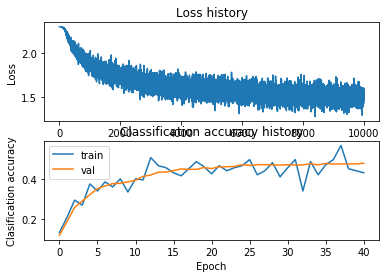

iteration 0 / 10000: loss 2.302509
iteration 100 / 10000: loss 2.296825
iteration 200 / 10000: loss 2.264105
iteration 300 / 10000: loss 2.137723
iteration 400 / 10000: loss 2.130563
iteration 500 / 10000: loss 2.010696
iteration 600 / 10000: loss 2.027200
iteration 700 / 10000: loss 1.927367
iteration 800 / 10000: loss 1.951028
iteration 900 / 10000: loss 1.922269
iteration 1000 / 10000: loss 1.890131
iteration 1100 / 10000: loss 1.866987
iteration 1200 / 10000: loss 1.927607
iteration 1300 / 10000: loss 1.811232
iteration 1400 / 10000: loss 1.843977
iteration 1500 / 10000: loss 1.860018
iteration 1600 / 10000: loss 1.853286
iteration 1700 / 10000: loss 1.785741
iteration 1800 / 10000: loss 1.710563
iteration 1900 / 10000: loss 1.789110
iteration 2000 / 10000: loss 1.723832
iteration 2100 / 10000: loss 1.589705
iteration 2200 / 10000: loss 1.670347
iteration 2300 / 10000: loss 1.777945
iteration 2400 / 10000: loss 1.685332
iteration 2500 / 10000: loss 1.636134
iteration 2600 / 10000: 

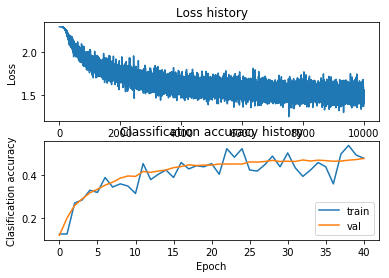

iteration 0 / 10000: loss 2.302636
iteration 100 / 10000: loss 2.302359
iteration 200 / 10000: loss 2.301849
iteration 300 / 10000: loss 2.301673
iteration 400 / 10000: loss 2.301301
iteration 500 / 10000: loss 2.300532
iteration 600 / 10000: loss 2.300395
iteration 700 / 10000: loss 2.300204
iteration 800 / 10000: loss 2.297989
iteration 900 / 10000: loss 2.298692
iteration 1000 / 10000: loss 2.296812
iteration 1100 / 10000: loss 2.296493
iteration 1200 / 10000: loss 2.294179
iteration 1300 / 10000: loss 2.291597
iteration 1400 / 10000: loss 2.289723
iteration 1500 / 10000: loss 2.292649
iteration 1600 / 10000: loss 2.286152
iteration 1700 / 10000: loss 2.284292
iteration 1800 / 10000: loss 2.277630
iteration 1900 / 10000: loss 2.280316
iteration 2000 / 10000: loss 2.286450
iteration 2100 / 10000: loss 2.265110
iteration 2200 / 10000: loss 2.263399
iteration 2300 / 10000: loss 2.266863
iteration 2400 / 10000: loss 2.251524
iteration 2500 / 10000: loss 2.240758
iteration 2600 / 10000: 

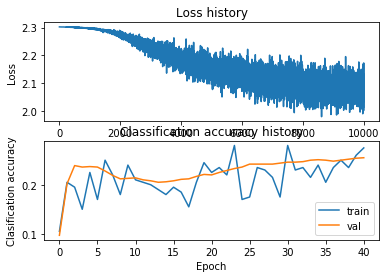

iteration 0 / 10000: loss 2.302585
iteration 100 / 10000: loss 2.302409
iteration 200 / 10000: loss 2.302090
iteration 300 / 10000: loss 2.301989
iteration 400 / 10000: loss 2.301712
iteration 500 / 10000: loss 2.300971
iteration 600 / 10000: loss 2.300745
iteration 700 / 10000: loss 2.300002
iteration 800 / 10000: loss 2.300289
iteration 900 / 10000: loss 2.300140
iteration 1000 / 10000: loss 2.297997
iteration 1100 / 10000: loss 2.298471
iteration 1200 / 10000: loss 2.293699
iteration 1300 / 10000: loss 2.294872
iteration 1400 / 10000: loss 2.295108
iteration 1500 / 10000: loss 2.291530
iteration 1600 / 10000: loss 2.285088
iteration 1700 / 10000: loss 2.292694
iteration 1800 / 10000: loss 2.288136
iteration 1900 / 10000: loss 2.280882
iteration 2000 / 10000: loss 2.281010
iteration 2100 / 10000: loss 2.276900
iteration 2200 / 10000: loss 2.266220
iteration 2300 / 10000: loss 2.271111
iteration 2400 / 10000: loss 2.265880
iteration 2500 / 10000: loss 2.258669
iteration 2600 / 10000: 

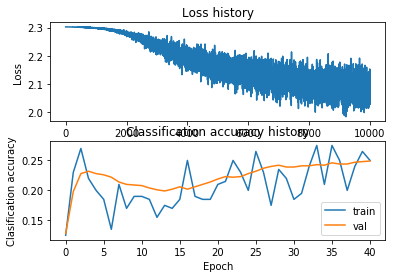

iteration 0 / 10000: loss 2.302566
iteration 100 / 10000: loss 2.302582
iteration 200 / 10000: loss 2.302485
iteration 300 / 10000: loss 2.302419
iteration 400 / 10000: loss 2.302419
iteration 500 / 10000: loss 2.302305
iteration 600 / 10000: loss 2.302321
iteration 700 / 10000: loss 2.302258
iteration 800 / 10000: loss 2.302344
iteration 900 / 10000: loss 2.302311
iteration 1000 / 10000: loss 2.302271
iteration 1100 / 10000: loss 2.302198
iteration 1200 / 10000: loss 2.302189
iteration 1300 / 10000: loss 2.302252
iteration 1400 / 10000: loss 2.302217
iteration 1500 / 10000: loss 2.302008
iteration 1600 / 10000: loss 2.302279
iteration 1700 / 10000: loss 2.302137
iteration 1800 / 10000: loss 2.302121
iteration 1900 / 10000: loss 2.302055
iteration 2000 / 10000: loss 2.301971
iteration 2100 / 10000: loss 2.302022
iteration 2200 / 10000: loss 2.301954
iteration 2300 / 10000: loss 2.302128
iteration 2400 / 10000: loss 2.302011
iteration 2500 / 10000: loss 2.301931
iteration 2600 / 10000: 

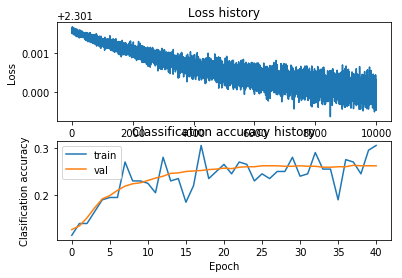

iteration 0 / 10000: loss 2.302610
iteration 100 / 10000: loss 2.302587
iteration 200 / 10000: loss 2.302479
iteration 300 / 10000: loss 2.302490
iteration 400 / 10000: loss 2.302508
iteration 500 / 10000: loss 2.302440
iteration 600 / 10000: loss 2.302469
iteration 700 / 10000: loss 2.302415
iteration 800 / 10000: loss 2.302498
iteration 900 / 10000: loss 2.302304
iteration 1000 / 10000: loss 2.302316
iteration 1100 / 10000: loss 2.302326
iteration 1200 / 10000: loss 2.302263
iteration 1300 / 10000: loss 2.302237
iteration 1400 / 10000: loss 2.302380
iteration 1500 / 10000: loss 2.302167
iteration 1600 / 10000: loss 2.302253
iteration 1700 / 10000: loss 2.302294
iteration 1800 / 10000: loss 2.302198
iteration 1900 / 10000: loss 2.302132
iteration 2000 / 10000: loss 2.302176
iteration 2100 / 10000: loss 2.302241
iteration 2200 / 10000: loss 2.302164
iteration 2300 / 10000: loss 2.302227
iteration 2400 / 10000: loss 2.302076
iteration 2500 / 10000: loss 2.302097
iteration 2600 / 10000: 

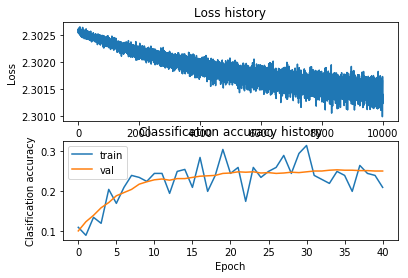

In [28]:
hidden_sizes = [700,500]
learning_rates = [1e-4,1e-5,1e-6]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
regularization_strengths = [.000005]
epochs = [10000]
params_values = [(lr, reg,hidden_size,epoch_num) for lr in learning_rates
                                       for reg in regularization_strengths
                                       for hidden_size in hidden_sizes
                                        for epoch_num in epochs]
#params_values
results,best_val,best_net = GridSearch(params_values)

In [29]:
print_train_valid_scores(results,best_val)

lr 1.000000e-06 reg 5.000000e-06 hidden_size 500 epoch_num 10000 train accuracy: 0.248020 val accuracy: 0.250000
lr 1.000000e-06 reg 5.000000e-06 hidden_size 700 epoch_num 10000 train accuracy: 0.249673 val accuracy: 0.263000
lr 1.000000e-05 reg 5.000000e-06 hidden_size 500 epoch_num 10000 train accuracy: 0.237061 val accuracy: 0.248000
lr 1.000000e-05 reg 5.000000e-06 hidden_size 700 epoch_num 10000 train accuracy: 0.240796 val accuracy: 0.255000
lr 1.000000e-04 reg 5.000000e-06 hidden_size 500 epoch_num 10000 train accuracy: 0.473449 val accuracy: 0.474000
lr 1.000000e-04 reg 5.000000e-06 hidden_size 700 epoch_num 10000 train accuracy: 0.475959 val accuracy: 0.476000
best validation accuracy achieved during cross-validation: 0.476000


# Tuning 4
**More Tuning for learning rates **

iteration 0 / 10000: loss 2.302604
iteration 100 / 10000: loss 1.885708
iteration 200 / 10000: loss 1.714994
iteration 300 / 10000: loss 1.726283
iteration 400 / 10000: loss 1.613642
iteration 500 / 10000: loss 1.505123
iteration 600 / 10000: loss 1.510393
iteration 700 / 10000: loss 1.530610
iteration 800 / 10000: loss 1.560935
iteration 900 / 10000: loss 1.471987
iteration 1000 / 10000: loss 1.468245
iteration 1100 / 10000: loss 1.384283
iteration 1200 / 10000: loss 1.347479
iteration 1300 / 10000: loss 1.290151
iteration 1400 / 10000: loss 1.312645
iteration 1500 / 10000: loss 1.287691
iteration 1600 / 10000: loss 1.173752
iteration 1700 / 10000: loss 1.038944
iteration 1800 / 10000: loss 1.177842
iteration 1900 / 10000: loss 1.270483
iteration 2000 / 10000: loss 1.214658
iteration 2100 / 10000: loss 1.219832
iteration 2200 / 10000: loss 1.057918
iteration 2300 / 10000: loss 1.097125
iteration 2400 / 10000: loss 1.261432
iteration 2500 / 10000: loss 1.003405
iteration 2600 / 10000: 

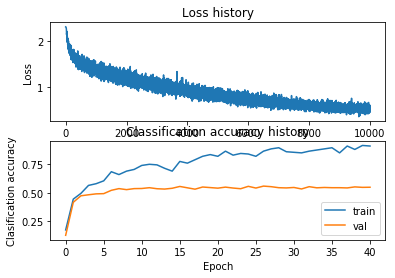

iteration 0 / 10000: loss 2.302642
iteration 100 / 10000: loss 2.297906
iteration 200 / 10000: loss 2.271061
iteration 300 / 10000: loss 2.168380
iteration 400 / 10000: loss 2.146331
iteration 500 / 10000: loss 2.096138
iteration 600 / 10000: loss 2.007484
iteration 700 / 10000: loss 1.916149
iteration 800 / 10000: loss 1.982601
iteration 900 / 10000: loss 1.841852
iteration 1000 / 10000: loss 1.848911
iteration 1100 / 10000: loss 1.887509
iteration 1200 / 10000: loss 1.888711
iteration 1300 / 10000: loss 1.879048
iteration 1400 / 10000: loss 1.816744
iteration 1500 / 10000: loss 1.732677
iteration 1600 / 10000: loss 1.745722
iteration 1700 / 10000: loss 1.847097
iteration 1800 / 10000: loss 1.796061
iteration 1900 / 10000: loss 1.741984
iteration 2000 / 10000: loss 1.751655
iteration 2100 / 10000: loss 1.723576
iteration 2200 / 10000: loss 1.882497
iteration 2300 / 10000: loss 1.816390
iteration 2400 / 10000: loss 1.653434
iteration 2500 / 10000: loss 1.699053
iteration 2600 / 10000: 

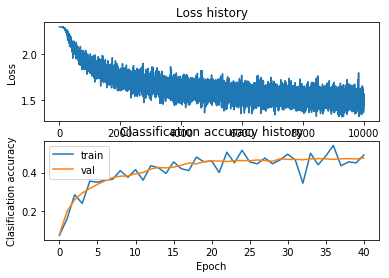

In [30]:
hidden_sizes = [500]
learning_rates = [1e-3,1e-4]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
regularization_strengths = [.000005]
epochs = [10000]
params_values = [(lr, reg,hidden_size,epoch_num) for lr in learning_rates
                                       for reg in regularization_strengths
                                       for hidden_size in hidden_sizes
                                        for epoch_num in epochs]
#params_values
results,best_val,best_net = GridSearch(params_values)

In [31]:
print_train_valid_scores(results,best_val)

lr 1.000000e-04 reg 5.000000e-06 hidden_size 500 epoch_num 10000 train accuracy: 0.474041 val accuracy: 0.471000
lr 1.000000e-03 reg 5.000000e-06 hidden_size 500 epoch_num 10000 train accuracy: 0.859306 val accuracy: 0.541000
best validation accuracy achieved during cross-validation: 0.541000


# Tuning 5
**More and More Tuning for learning rates **
- we try near values for the best value (1*10^-3)
- we got the best validation score so far with 56% 
- notice that values lr > 2e-3 causes instability

iteration 0 / 10000: loss 2.302494
iteration 100 / 10000: loss 1.747172
iteration 200 / 10000: loss 1.749618
iteration 300 / 10000: loss 1.618993
iteration 400 / 10000: loss 1.560286
iteration 500 / 10000: loss 1.493214
iteration 600 / 10000: loss 1.457880
iteration 700 / 10000: loss 1.551916
iteration 800 / 10000: loss 1.482016
iteration 900 / 10000: loss 1.289969
iteration 1000 / 10000: loss 1.309313
iteration 1100 / 10000: loss 1.265700
iteration 1200 / 10000: loss 1.324808
iteration 1300 / 10000: loss 1.340730
iteration 1400 / 10000: loss 1.213385
iteration 1500 / 10000: loss 1.344658
iteration 1600 / 10000: loss 1.143131
iteration 1700 / 10000: loss 1.265245
iteration 1800 / 10000: loss 1.092749
iteration 1900 / 10000: loss 1.187814
iteration 2000 / 10000: loss 1.260354
iteration 2100 / 10000: loss 1.114617
iteration 2200 / 10000: loss 1.284869
iteration 2300 / 10000: loss 1.038574
iteration 2400 / 10000: loss 1.100209
iteration 2500 / 10000: loss 1.144566
iteration 2600 / 10000: 

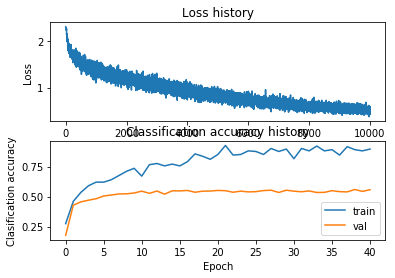

iteration 0 / 10000: loss 2.302594
iteration 100 / 10000: loss 1.815536
iteration 200 / 10000: loss 1.623370
iteration 300 / 10000: loss 1.501467
iteration 400 / 10000: loss 1.616484
iteration 500 / 10000: loss 1.569473
iteration 600 / 10000: loss 1.490430
iteration 700 / 10000: loss 1.356391
iteration 800 / 10000: loss 1.387176
iteration 900 / 10000: loss 1.461055
iteration 1000 / 10000: loss 1.265508
iteration 1100 / 10000: loss 1.292731
iteration 1200 / 10000: loss 1.480674
iteration 1300 / 10000: loss 1.235761
iteration 1400 / 10000: loss 1.384237
iteration 1500 / 10000: loss 1.336985
iteration 1600 / 10000: loss 1.340562
iteration 1700 / 10000: loss 1.224668
iteration 1800 / 10000: loss 1.092291
iteration 1900 / 10000: loss 1.155835
iteration 2000 / 10000: loss 1.254823
iteration 2100 / 10000: loss 1.305920
iteration 2200 / 10000: loss 1.366508
iteration 2300 / 10000: loss 1.226540
iteration 2400 / 10000: loss 1.201150
iteration 2500 / 10000: loss 1.091794
iteration 2600 / 10000: 

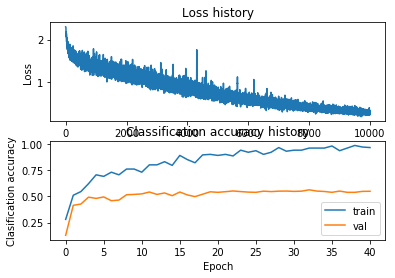

iteration 0 / 10000: loss 2.302634
iteration 100 / 10000: loss 1.811674


C:\Users\Yahia\Desktop\Anaconda Projects\Data Mining\assignment1\cs231n\classifiers\neural_net.py:108: RuntimeWarning: divide by zero encountered in log
  correct_logprobs = -np.log(probs[range(num_examples),y]) # we compute -log(exp(Yi)/sum(exp(yj))) those will only contribute to loss


iteration 200 / 10000: loss inf
iteration 300 / 10000: loss inf
iteration 400 / 10000: loss inf
iteration 500 / 10000: loss inf
iteration 600 / 10000: loss inf
iteration 700 / 10000: loss inf
iteration 800 / 10000: loss inf
iteration 900 / 10000: loss inf
iteration 1000 / 10000: loss inf
iteration 1100 / 10000: loss inf
iteration 1200 / 10000: loss inf
iteration 1300 / 10000: loss inf
iteration 1400 / 10000: loss inf
iteration 1500 / 10000: loss inf
iteration 1600 / 10000: loss inf
iteration 1700 / 10000: loss inf
iteration 1800 / 10000: loss inf
iteration 1900 / 10000: loss inf
iteration 2000 / 10000: loss inf
iteration 2100 / 10000: loss inf
iteration 2200 / 10000: loss inf
iteration 2300 / 10000: loss inf
iteration 2400 / 10000: loss inf
iteration 2500 / 10000: loss inf
iteration 2600 / 10000: loss inf
iteration 2700 / 10000: loss inf
iteration 2800 / 10000: loss inf
iteration 2900 / 10000: loss inf
iteration 3000 / 10000: loss inf
iteration 3100 / 10000: loss inf
iteration 3200 / 1

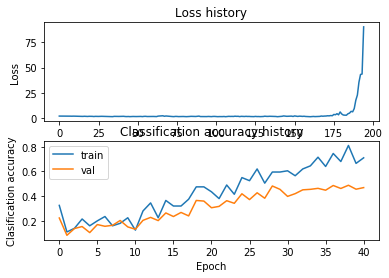

In [39]:
hidden_sizes = [500]
learning_rates = [1e-3,2e-3,4e-3]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
regularization_strengths = [.000005]
epochs = [10000]
params_values = [(lr, reg,hidden_size,epoch_num) for lr in learning_rates
                                       for reg in regularization_strengths
                                       for hidden_size in hidden_sizes
                                        for epoch_num in epochs]
#params_values
results,best_val,best_net = GridSearch(params_values)

In [40]:
print_train_valid_scores(results,best_val)

lr 1.000000e-03 reg 5.000000e-06 hidden_size 500 epoch_num 10000 train accuracy: 0.857816 val accuracy: 0.560000
lr 2.000000e-03 reg 5.000000e-06 hidden_size 500 epoch_num 10000 train accuracy: 0.931286 val accuracy: 0.549000
lr 4.000000e-03 reg 5.000000e-06 hidden_size 500 epoch_num 10000 train accuracy: 0.735878 val accuracy: 0.502000
best validation accuracy achieved during cross-validation: 0.560000


In [54]:
import pandas as pd
df = pd.read_csv("NNGS.csv") # this is a file that was saving parameters values 
# and scores of previos long Grid Search saved for backup
# i will use it's plotting as intuition
# we will notice that good parameters values has significaly higher mean in the plot also more high scores

lr = 0.000000 , mean of val_score = 0.100148
lr = 0.000010 , mean of val_score = 0.142519
lr = 0.000100 , mean of val_score = 0.171222
reg = 0.250000 , mean of val_score = 0.218333
reg = 250.000000 , mean of val_score = 0.108111
reg = 25000.000000 , mean of val_score = 0.087444
hidden_size = 50.000000 , mean of val_score = 0.137111
hidden_size = 100.000000 , mean of val_score = 0.134741
hidden_size = 150.000000 , mean of val_score = 0.142037
epoch_num = 1000.000000 , mean of val_score = 0.135889
epoch_num = 2000.000000 , mean of val_score = 0.142481
epoch_num = 3000.000000 , mean of val_score = 0.135519


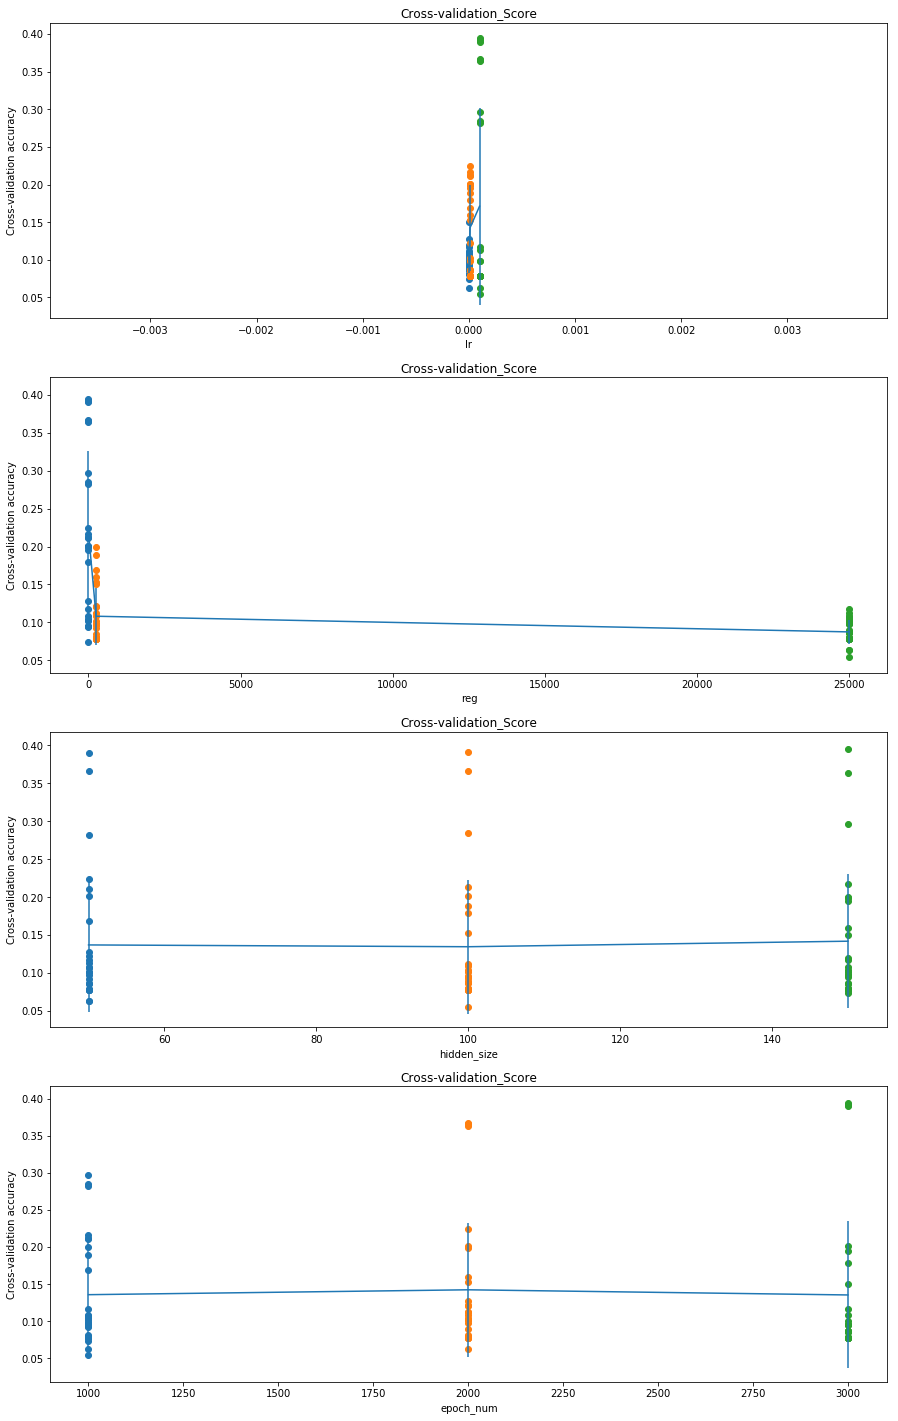

In [95]:
hyp_parameters = ['lr','reg','hidden_size','epoch_num']
i = 0
plt.figure(figsize=(15,25));

for hyp_parameter in hyp_parameters:
    plt.subplot(4,1, i + 1)
    accuracies_mean = []
    accuracies_std = []
    for value in df[hyp_parameter].unique():
        print("%s = %f , mean of val_score = %f"% (hyp_parameter,value,df[df[hyp_parameter] == value]['val_accuracy'].mean()))
        accuracies_mean.append(df[df[hyp_parameter] == value]['val_accuracy'].mean())
        accuracies_std.append(df[df[hyp_parameter] == value]['val_accuracy'].std())
        plt.scatter([value] * len(df[df[hyp_parameter] == value]['val_accuracy']), df[df[hyp_parameter] == value]['val_accuracy'])
    i += 1
    # plot the trend line with error bars that correspond to standard deviation
    accuracies_mean = np.array(accuracies_mean)
    accuracies_std = np.array(accuracies_std)
    plt.errorbar(df[hyp_parameter].unique(), accuracies_mean, yerr=accuracies_std)
    plt.title('Cross-validation_Score')
    plt.xlabel(hyp_parameter)
    plt.ylabel('Cross-validation accuracy')

<Figure size 360x360 with 0 Axes>

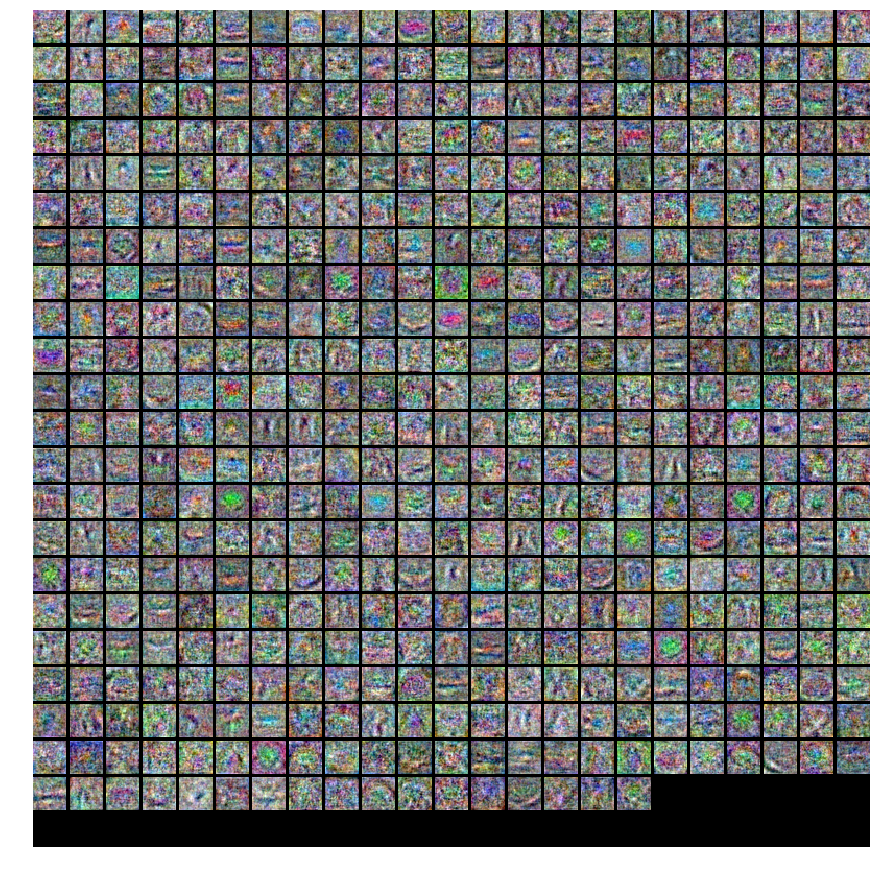

In [41]:
# visualize the weights of the best network
plt.figure(figsize=(5,5));
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [42]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.553


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*:

*Your explanation:*